# Figure 3bcd from Oliva et al. (2019)
Here we reproduce the results from figure 3bcd in Oliva et al. (2019) to validate our implementation of their "Gossip algorithm for multi-agent systems via random walk". Oliva et al. simulated 10 agents on a graph with 40 nodes and 161 edges for 1000 steps, whereby agents took actions following a Poisson process with rate 1. Our experiments with identical parameters match the results from Oliva et al.

## Imports

In [21]:
from operator import add
from exp_oliva_fig3bcd import run_simulation

import matplotlib
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Fig. 3b: Agent error evolution for a particular realization
Individual agent errors disappear over time as the agents average estimates and so converge to the initial mean. Please note that results might vary among realizations due to the randomness of the underlying graph and the agents' movements and interactions.

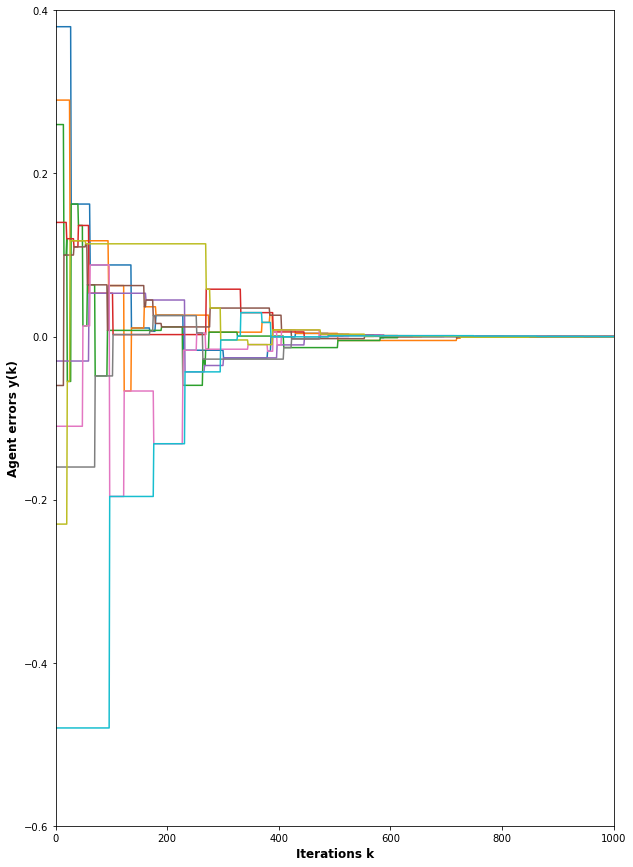

In [22]:
# parameters (from Oliva et al. (2019))
no_agents = 10
init_val = [0.38, 0.29, 0.26, 0.14, -0.03, -0.06, -0.11, -0.16, -0.23, -0.48]
clock_rate = 1 # Poisson process for asynchronous agent actions
graph_type = 'Gnm'
graph_size = 40 # n
edge_number = 161 # m
simulation_steps = 1000

run_simulation(no_agents, init_val, clock_rate, graph_type, graph_size, edge_number, simulation_steps)

## Fig. 3c: Empirical agent error means (1st moment) over 500 realizations
Expected individual agent errors disappear over time as the agents average estimates and so converge to the initial mean.

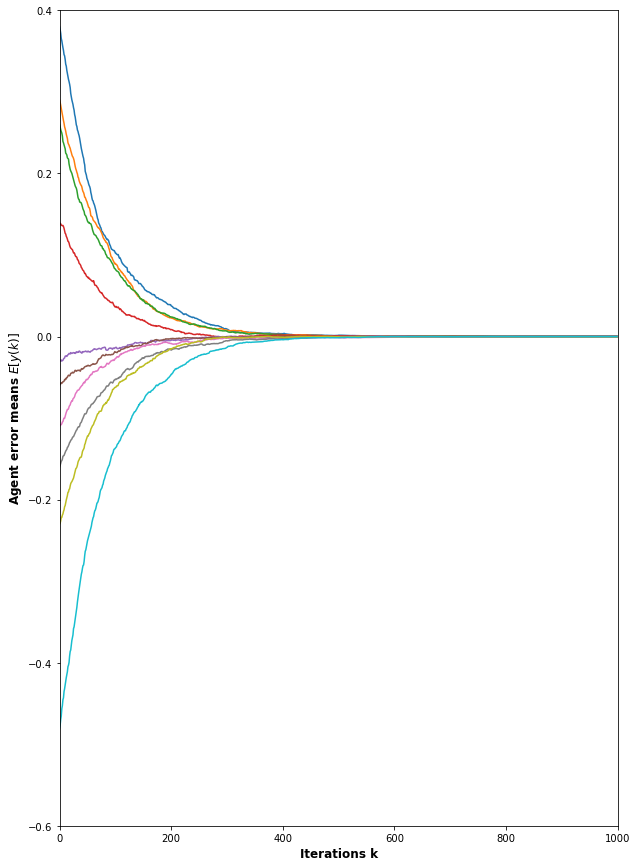

In [26]:
# parameters (from Oliva et al. (2019))
no_agents = 10
init_val = [0.38, 0.29, 0.26, 0.14, -0.03, -0.06, -0.11, -0.16, -0.23, -0.48]
clock_rate = 1 # Poisson process for asynchronous agent actions
graph_type = 'Gnm'
graph_size = 40 # n
edge_number = 161 # m
simulation_steps = 1000

multi_sim = True

no_sim = 500
err_all = [[0]*simulation_steps for n in range(no_agents)]
for sim in range(no_sim):
    (err_t, var_t) = run_simulation(no_agents, init_val, clock_rate, graph_type, graph_size, edge_number, simulation_steps, multi_sim)
    for n in range(no_agents):
        err_all[n] = list(map(add, err_all[n], err_t[n]))    

fig = plt.figure(figsize=(10,15))
for n in range(no_agents):
    err_all[n] = list(map(lambda x: x/no_sim, err_all[n])) 
    plt.plot(list(range(simulation_steps)), err_all[n])

plt.xlim((0, 1000))
plt.ylim((-0.6, 0.4))
plt.xlabel('Iterations k', fontsize='large', fontweight='bold')
plt.ylabel('Agent error means $E[y(k)]$', fontsize='large', fontweight='bold')
plt.show()
plt.close()

## Fig. 3d: Empirical agent error variance (2nd moment) over 500 realizations
Agent error variance disappears over time as the agents average estimates and so converge to the initial mean.

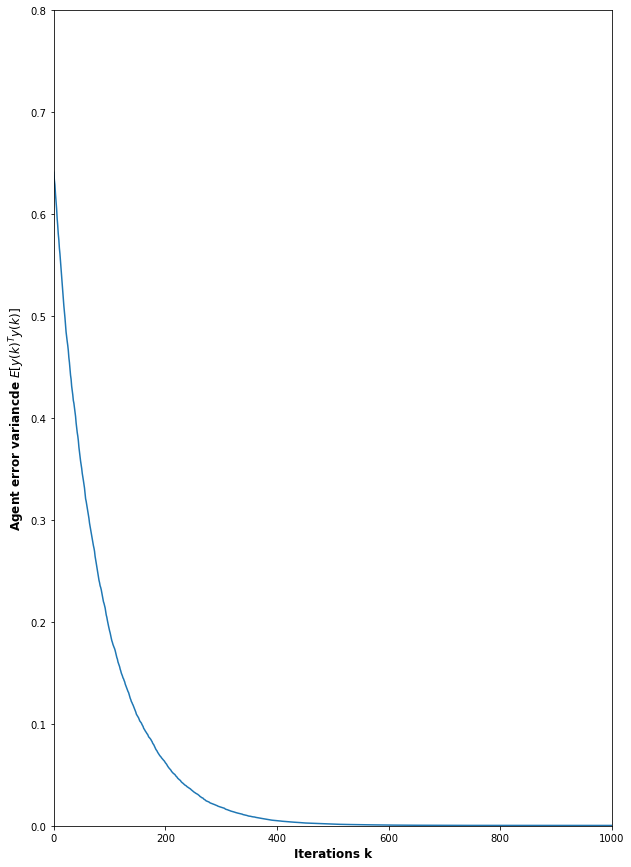

In [25]:
# parameters (from Oliva et al. (2019))
no_agents = 10
init_val = [0.38, 0.29, 0.26, 0.14, -0.03, -0.06, -0.11, -0.16, -0.23, -0.48]
clock_rate = 1 # Poisson process for asynchronous agent actions
graph_type = 'Gnm'
graph_size = 40 # n
edge_number = 161 # m
simulation_steps = 1000

multi_sim = True

no_sim = 500
var_all = [0]*simulation_steps
for sim in range(no_sim):
    (err_t, var_t) = run_simulation(no_agents, init_val, clock_rate, graph_type, graph_size, edge_number, simulation_steps, multi_sim)
    var_all = list(map(add, var_all, var_t))    

fig = plt.figure(figsize=(10,15))
var_all = list(map(lambda x: x/no_sim*no_agents, var_all)) 
plt.plot(list(range(simulation_steps)), var_all)

plt.xlim((0, 1000))
plt.ylim((0, 0.8))
plt.xlabel('Iterations k', fontsize='large', fontweight='bold')
plt.ylabel('Agent error variancde $E[y(k)^T y(k)]$', fontsize='large', fontweight='bold')
plt.show()
plt.close()